# Step 3: Customer Segmentation Model

This notebook performs customer segmentation using clustering techniques.

## Objectives

1. Load processed features from the feature engineering stage  
2. Apply Principal Component Analysis (PCA) for data visualization  
3. Determine the optimal number of clusters  
4. Apply K-Means clustering  
5. Analyze and interpret customer segments  
6. Save the clustering results  

## What is Customer Segmentation?

Customer segmentation is the process of dividing customers into groups based on shared characteristics. This helps businesses to:
- Understand different customer behaviors  
- Target marketing efforts more effectively  
- Improve customer service  
- Increase customer retention  


## Import Libraries


In [1]:
%load_ext autoreload
%autoreload 2

# Import libraries
import sys
sys.path.append('C:/Users/HP/Downloads/e_commerce_Dataset/e_commerce_project/src')

from clustering_library import ClusterAnalyzer
import matplotlib.pyplot as plt

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Processed Data


In [2]:
# Load standardized features (prepared for clustering)
scaled_path = '../data/processed/customer_features_scaled.csv'
original_path = '../data/processed/customer_features.csv'

# Initialize the cluster analyzer and load the data
analyzer = ClusterAnalyzer(scaled_path, original_path)
df_scaled, df_original = analyzer.load_data()

df_scaled.head()


Number of Customers: 1628
Number of Features: 16


,Discount_Affinity,AOV,Recency,Count_Orders,Count_Products,Sum_Quantity,Mean_UnitPrice,Mean_QuantityPerOrder,Avg_UnitPricePerProduct,Avg_QuantityPerProduct,Avg_TotalPricePerProduct,Avg_TotalPricePerInvoice,Max_Avg_Order_Value,Min_Avg_Order_Value,Max_Total_Order_Value,Min_Total_Order_Value
customer_id,,,,,,,,,,,,,,,,
CUST0000005,-0.342904,-1.258313,2.104404,-0.478164,-0.640614,-1.260613,0.536856,-1.376552,-0.014524,-1.219036,-1.176896,-1.258313,-1.258313,-1.258313,-1.163242,-0.521976
CUST0000006,0.560477,1.226716,0.147444,0.671752,0.606361,1.697625,1.425995,1.481110,0.730477,1.489409,1.249130,1.226716,1.226716,1.226716,1.849680,0.639925
CUST0000009,0.736608,1.408125,0.673802,-0.178327,-0.315169,-0.598352,2.191394,-0.670697,1.442591,-0.532849,1.473972,1.408125,1.408125,1.408125,1.807931,1.269776
CUST0000011,-0.446744,-0.265368,0.063461,0.671752,0.898279,0.285779,-1.769221,-0.226596,-1.797642,-0.373378,-0.348548,-0.265368,-0.265368,-0.265368,1.228645,-0.355769
CUST0000013,2.612192,-2.148533,2.045845,-2.551054,-2.478534,-2.560745,-2.561502,-1.788014,-2.579505,-1.866548,-2.202116,-2.148533,-2.148533,-2.148533,-2.034770,-1.941487


In [3]:
# Check Basic Statistics

print("Summary statistics of the standardized data:")
df_scaled.describe().round(2)


Summary statistics of the standardized data:


,Discount_Affinity,AOV,Recency,Count_Orders,Count_Products,Sum_Quantity,Mean_UnitPrice,Mean_QuantityPerOrder,Avg_UnitPricePerProduct,Avg_QuantityPerProduct,Avg_TotalPricePerProduct,Avg_TotalPricePerInvoice,Max_Avg_Order_Value,Min_Avg_Order_Value,Max_Total_Order_Value,Min_Total_Order_Value
count,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00
mean,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.70,-2.93,-2.07,-2.97,-2.91,-3.33,-3.19,-3.45,-3.19,-3.52,-2.99,-2.93,-2.93,-2.93,-2.59,-2.21
25%,-0.71,-0.68,-0.74,-0.79,-0.64,-0.68,-0.65,-0.64,-0.65,-0.64,-0.68,-0.68,-0.68,-0.68,-0.72,-0.57
50%,-0.10,0.02,0.03,0.11,0.00,0.02,0.00,0.01,0.00,0.02,0.02,0.02,0.02,0.02,0.01,0.02
75%,0.67,0.69,0.71,0.67,0.61,0.70,0.65,0.64,0.68,0.64,0.68,0.69,0.69,0.69,0.72,0.69
max,3.24,3.20,2.98,3.14,3.29,3.44,3.47,3.71,3.15,3.54,3.76,3.20,3.20,3.20,3.28,2.66


## Principal Component Analysis (PCA)

PCA helps us to:
- Reduce the dimensionality of the dataset  
- Visualize high-dimensional data in 2D or 3D  
- Identify which features contribute most to the variance  
- Remove noise and redundant information  


In [4]:
# Apply PCA
df_pca = analyzer.apply_pca()
df_pca.head()

PCA shape: (1628, 16)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
customer_id,,,,,,,,,,,,,,,,
CUST0000005,-3.510340,-1.584312,-0.853445,-1.149371,-0.479641,1.377055,-0.716840,0.241006,-0.165725,0.422311,0.030513,0.026762,-0.005978,-4.575127e-15,3.110055e-16,3.231454e-15
CUST0000006,4.418142,0.793954,0.128203,0.464419,0.541120,0.890692,-0.113180,0.792691,0.101035,0.522738,0.181413,0.009504,-0.006744,-6.089199e-15,1.010205e-16,3.781762e-15
CUST0000009,3.524765,-2.586459,-1.642942,0.268109,-0.069418,0.687478,1.116084,0.432150,-0.140017,0.522548,0.006226,0.013006,0.001657,-4.442347e-15,1.674690e-16,3.398765e-15
CUST0000011,-0.859952,2.024645,0.382218,-0.953147,-0.912472,-0.351501,1.728040,0.481516,0.252665,0.019966,-0.053484,-0.025130,0.002402,-1.941812e-15,6.427861e-17,5.192279e-16
CUST0000013,-7.471728,-1.995546,1.904786,1.086480,-3.861034,1.188023,0.435556,-0.245587,0.018680,-0.024718,0.386933,0.007253,0.006284,3.577969e-15,-4.106369e-16,-2.774464e-15


### Explained Variance Ratio

Shows how much information (variance) each principal component captures.

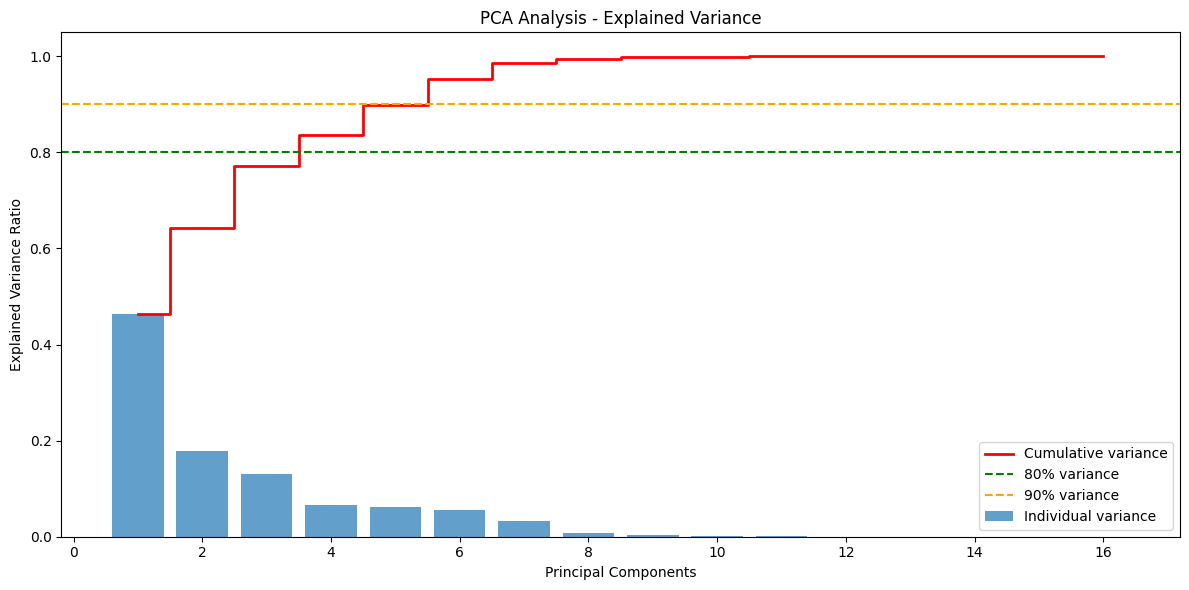


Cumulative variance:
PC1-PC1: 46.29%
PC1-PC2: 64.18%
PC1-PC3: 77.16%
PC1-PC4: 83.69%
PC1-PC5: 89.84%


In [5]:
# Explained Variance Ratio Plot
analyzer.plot_pca_variance()

## Determining the Optimal Number of Clusters

Finding the right number of clusters (k) is crucial for meaningful segmentation.  
We will use two complementary methods:

1. **Elbow Method** – Identify the “elbow” point in the inertia curve  
2. **Silhouette Score** – Find the k with the highest average silhouette score  

Using both methods together gives us more confidence in selecting an appropriate k.


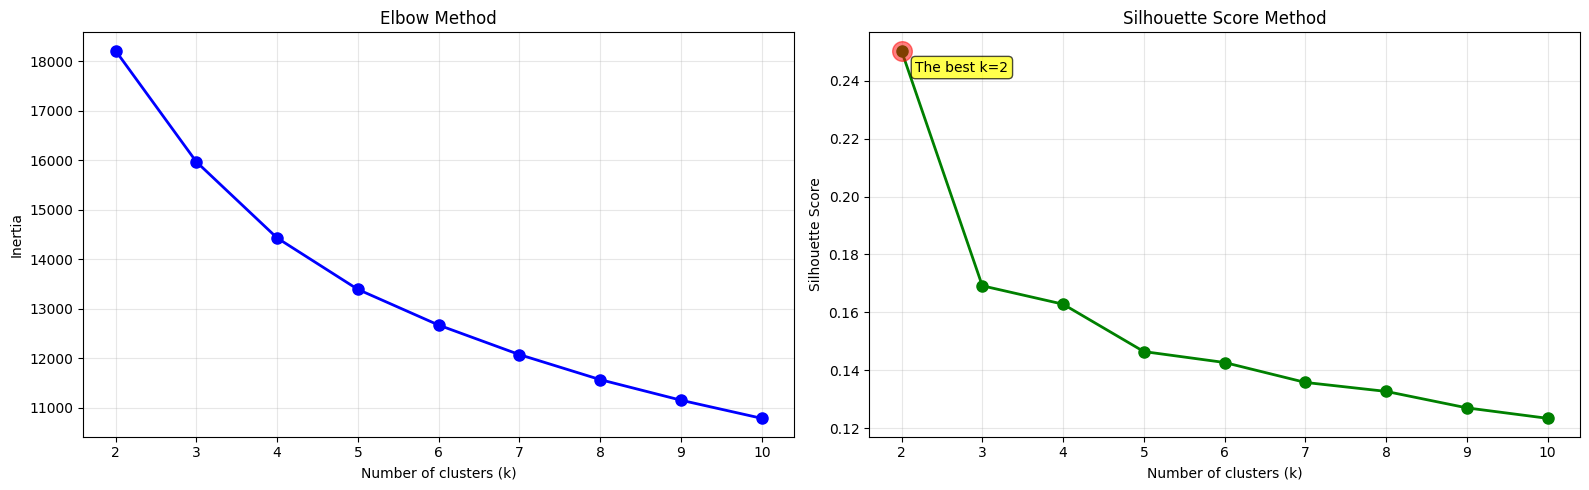

Recommended Silhouette Score: k=2 (score = 0.250)


In [6]:
# Find optimal number of clusters
optimal_results = analyzer.find_optimal_clusters()

# Plot comparison of methods
analyzer.plot_optimal_clusters()

## K-Means Clustering

We will apply K-Means clustering with different values of k (3 and 4) and compare the results.

Size of clusters (k=3):
0    522
1    596
2    510
Name: count, dtype: int64
Size of clusters (k=4):
0    326
1    458
2    346
3    498
Name: count, dtype: int64


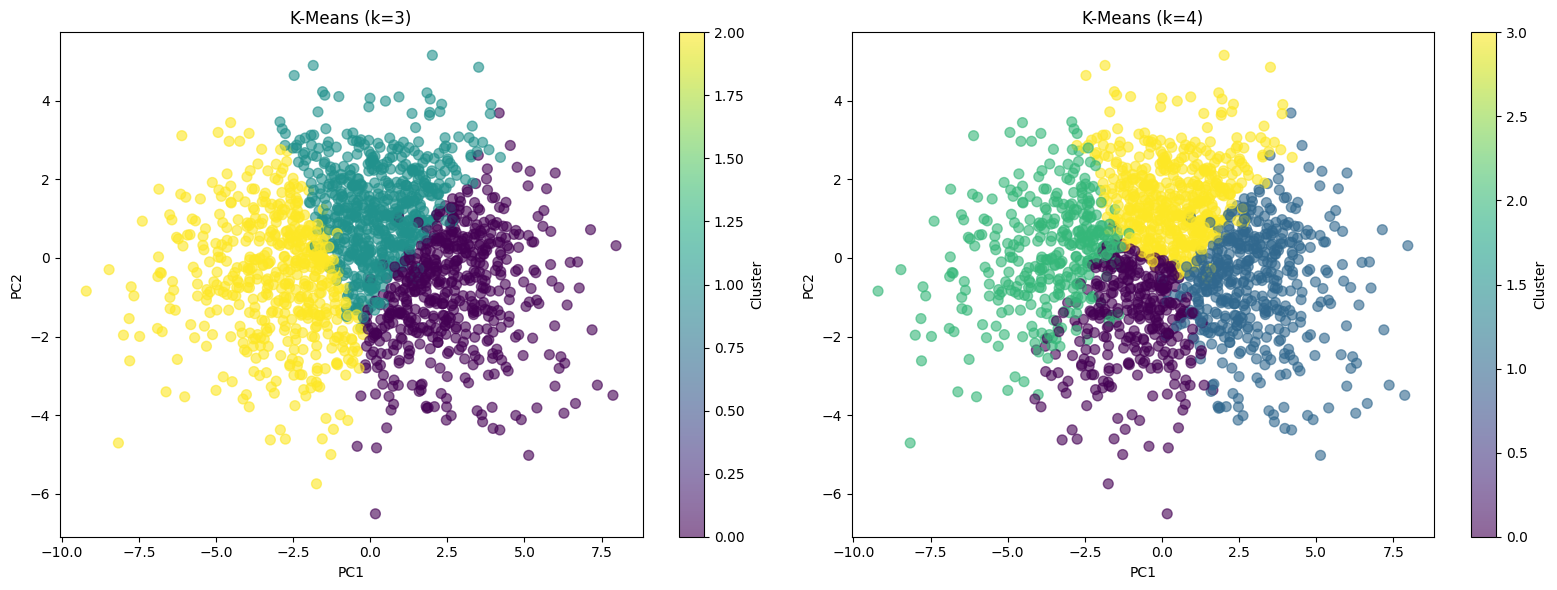

In [7]:
# Apply K-Means clustering with k=3 and k=4
cluster_results = analyzer.apply_kmeans([3, 4])

# Visualize clusters in the PCA space
analyzer.plot_clusters_pca([3, 4])


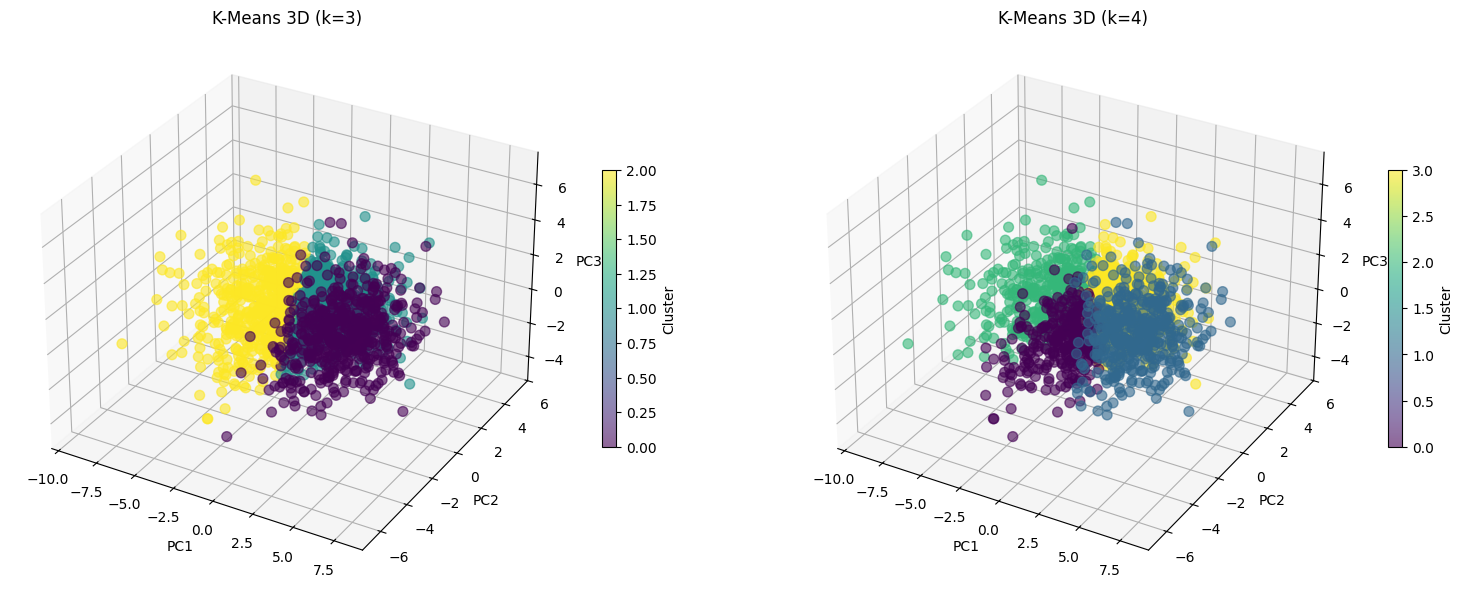

In [8]:
# Visualize clusters in the PCA 3D space
analyzer.plot_clusters_pca_3d([3, 4])

## Cluster Analysis and Interpretation

Analyze the characteristics of each cluster to understand the different customer segments.


In [9]:
# Average Statistics for Each Cluster (K=3)

print("CLUSTER ANALYSIS K=3")
cluster_means_3 = cluster_results[3]['means']
cluster_sizes_3 = cluster_results[3]['sizes']

print("Cluster sizes:")
for cluster, size in cluster_sizes_3.items():
    print(f"- Cluster {cluster}: {size:,} customers ({size/cluster_sizes_3.sum()*100:.1f}%)")

display(cluster_means_3.round(2).style.background_gradient(cmap='viridis', axis=0))


CLUSTER ANALYSIS K=3
Cluster sizes:
- Cluster 0: 522 customers (32.1%)
- Cluster 1: 596 customers (36.6%)
- Cluster 2: 510 customers (31.3%)


,Discount_Affinity,AOV,Recency,Count_Orders,Count_Products,Sum_Quantity,Mean_UnitPrice,Mean_QuantityPerOrder,Avg_UnitPricePerProduct,Avg_QuantityPerProduct,Avg_TotalPricePerProduct,Avg_TotalPricePerInvoice,Max_Avg_Order_Value,Min_Avg_Order_Value,Max_Total_Order_Value,Min_Total_Order_Value
Cluster_3,,,,,,,,,,,,,,,,
0,0.360000,949.160000,48.070000,10.600000,10.010000,75.070000,128.630000,7.140000,127.750000,7.580000,1007.980000,949.160000,949.160000,949.160000,4421.000000,28.050000
1,0.350000,557.850000,35.150000,14.340000,13.490000,87.940000,98.800000,6.150000,99.230000,6.560000,592.880000,557.850000,557.850000,557.850000,3148.920000,12.170000
2,0.350000,296.240000,53.390000,9.990000,9.560000,47.200000,87.760000,4.770000,88.730000,4.990000,309.440000,296.240000,296.240000,296.240000,1213.350000,16.900000


In [10]:
# Average Statistics for Each Cluster (K=4)

print("CLUSTER ANALYSIS K=4")
cluster_means_4 = cluster_results[4]['means']
cluster_sizes_4 = cluster_results[4]['sizes']

print("Cluster sizes:")
for cluster, size in cluster_sizes_4.items():
    print(f"- Cluster {cluster}: {size:,} customers ({size/cluster_sizes_4.sum()*100:.1f}%)")

display(cluster_means_4.round(2).style.background_gradient(cmap='viridis', axis=0))


CLUSTER ANALYSIS K=4
Cluster sizes:
- Cluster 0: 326 customers (20.0%)
- Cluster 1: 458 customers (28.1%)
- Cluster 2: 346 customers (21.3%)
- Cluster 3: 498 customers (30.6%)


,Discount_Affinity,AOV,Recency,Count_Orders,Count_Products,Sum_Quantity,Mean_UnitPrice,Mean_QuantityPerOrder,Avg_UnitPricePerProduct,Avg_QuantityPerProduct,Avg_TotalPricePerProduct,Avg_TotalPricePerInvoice,Max_Avg_Order_Value,Min_Avg_Order_Value,Max_Total_Order_Value,Min_Total_Order_Value,Cluster_3
Cluster_4,,,,,,,,,,,,,,,,,
0,0.340000,481.740000,57.600000,9.800000,9.360000,45.340000,122.530000,4.740000,122.840000,4.960000,505.360000,481.740000,481.740000,481.740000,2095.330000,22.740000,1.330000
1,0.360000,993.070000,45.710000,10.860000,10.250000,79.280000,126.550000,7.420000,125.750000,7.870000,1054.460000,993.070000,993.070000,993.070000,4665.190000,27.300000,0.000000
2,0.360000,243.990000,49.190000,10.530000,10.050000,51.620000,72.430000,4.920000,73.280000,5.170000,256.020000,243.990000,243.990000,243.990000,1034.560000,13.420000,1.980000
3,0.350000,567.720000,33.210000,14.790000,13.900000,93.820000,96.020000,6.400000,96.550000,6.830000,604.550000,567.720000,567.720000,567.720000,3264.330000,11.950000,1.000000


### Radar Chart for Cluster Profiles

Radar charts help us visually compare the characteristics of each cluster.

#### How to Read a Radar Chart:

1. **Each axis = 1 customer feature** (scaled 0–1)  
2. **Farther from the center = higher value** for that feature  
3. **The shape of the polygon** represents the “profile” of the cluster  
4. **Compare clusters** by examining the shape and size of the polygons  


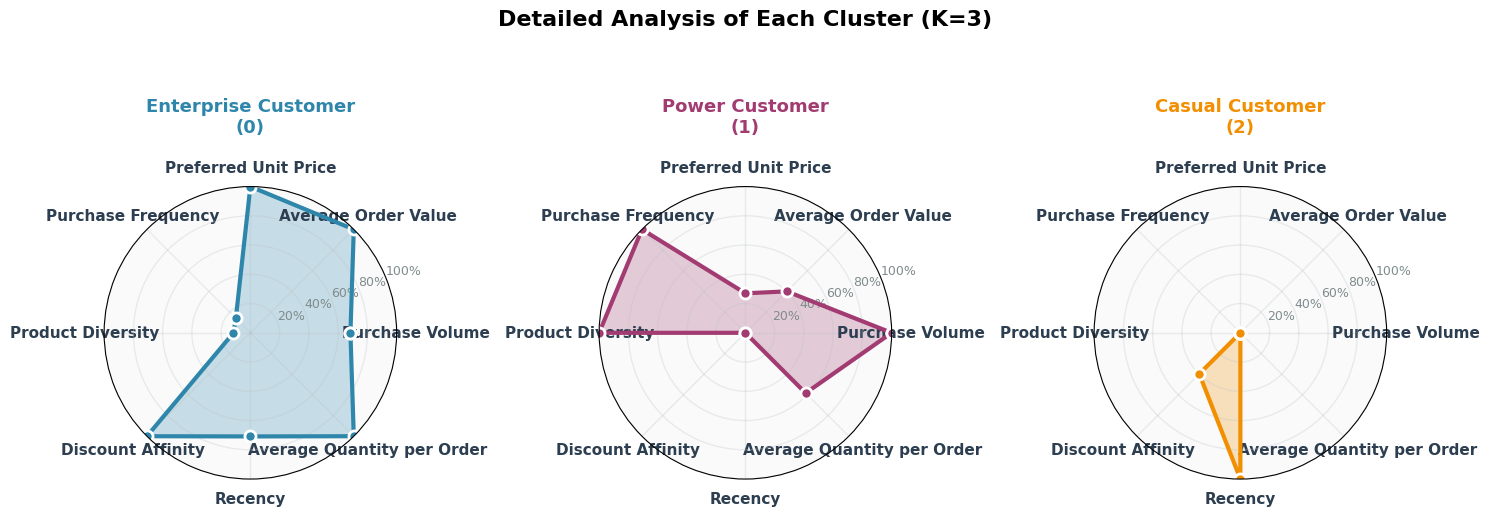

In [11]:
# Tạo individual radar plots cho k=3
analyzer.create_individual_radar_plots(3, ['Enterprise Customer', 'Power Customer', 'Casual Customer'])

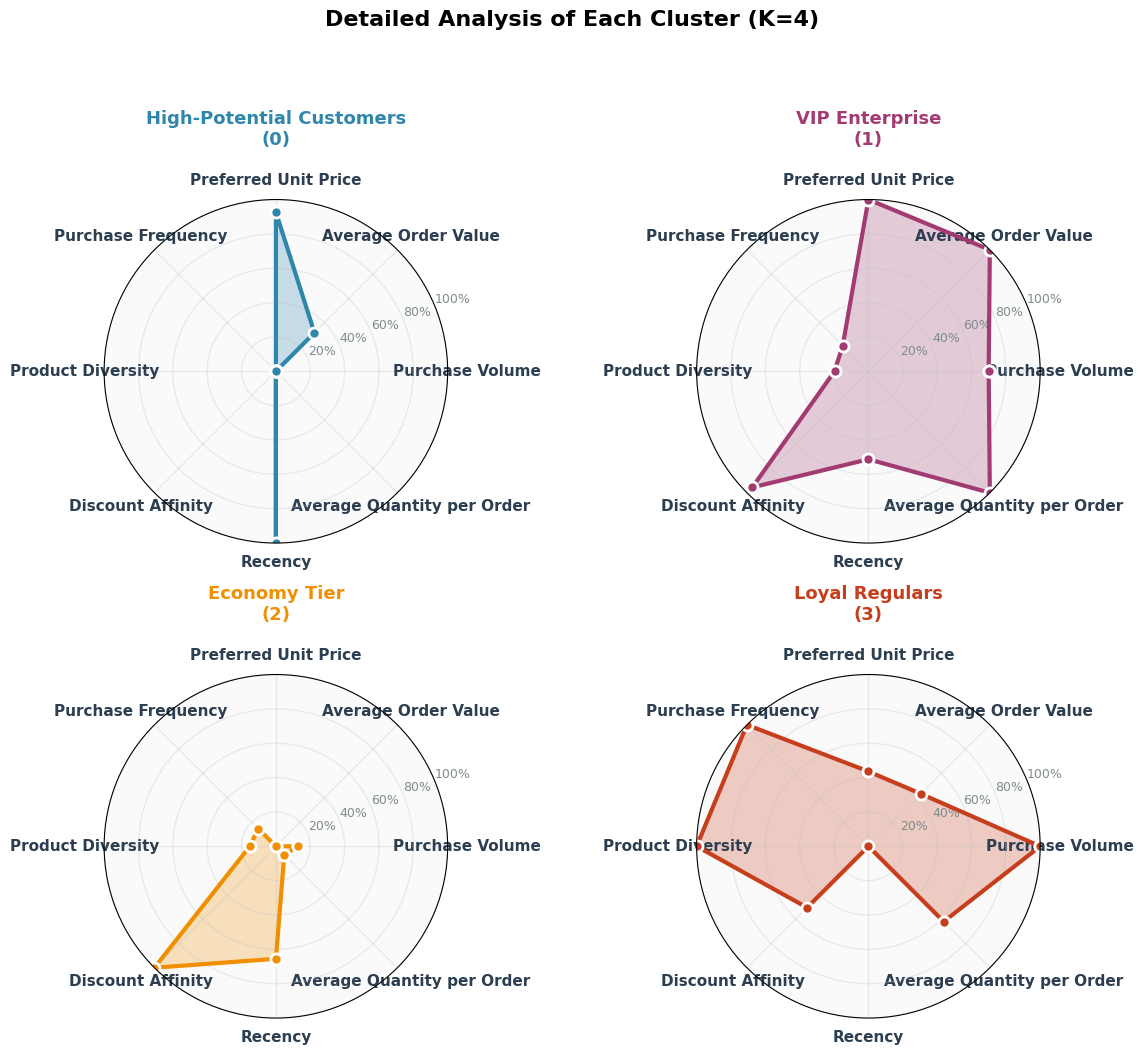

In [12]:
# Tạo individual radar plots cho k=4
analyzer.create_individual_radar_plots(4, ['High-Potential Customers', 'VIP Enterprise', 'Economy Tier', 'Loyal Regulars'])

### Radar Chart Analysis

#### Comparing K=3 vs K=4 – Customer Segment Insights

---

##### K=3 Clusters:

- **Cluster 0 – Enterprise Customer (32%)**  
  - High spending  
  - Low purchase frequency, high unit price → VIP customers

- **Cluster 1 – Power Customer (36%)**  
  - High quantity and frequency → revenue drivers  

- **Cluster 2 – Casual Customer (31%)**  
  - Prefers cheap products  
  - Moderate purchase frequency, likes to try various items

---

##### K=4 Clusters:

- **Cluster 0 – High-Potential Customers (20%)**  
  - Low frequency, high unit price → light premium customers

- **Cluster 1 – VIP Enterprise (28%)**  
  - High spending → core VIP customers

- **Cluster 2 – Economy Tier (21%)**  
  - Moderate quantity, low unit price → price-sensitive buyers

- **Cluster 3 – Loyal Regulars (31%)**  
  - High orders and quantity, consistent purchases → loyal customers

---

#### Summary of K=3 → K=4 Transition

| K=3               | K=4                     | Meaning                            |
|------------------|------------------------|-----------------------------------|
| Cluster 0 VIP     | Cluster 1 + Cluster 0   | Split VIP into 2 segments         |
| Cluster 1 Frequent| Cluster 3 + part Cluster 1 | Heavy buyers split into medium & high |
| Cluster 2 Low Price| Cluster 2              | Behavior remains the same          |

---

#### Insights from Radar Chart

- **Cluster 1 in K=3 too large** → split into:  
  - High-spending premium (Cluster 1 K=4)  
  - Frequent & high-volume buyers (Cluster 3 K=4)
  
- **Basic patterns**:  
  - **Enterprise Clients**: High unit price, low frequency → high-margin  
  - **Power Customer**: High quantity & frequency → volume-driven  
  - **Casual Customer**: Diverse products, low price → discovery-oriented

- **Conclusion**: K=4 provides clearer segmentation, easier targeting, each segment has a dedicated strategy.  

---

#### Recommendations for K=4

- **High-Potential Customers**: VIP perks, loyalty programs  
- **Enterprise VIP**: Exclusive offers, early access  
- **Economy Tier**: Discounts, bundle deals  
- **Loyal Regulars**: Volume discounts, subscription, B2B packages



## Save clustering results

In [13]:
# Save clustering results for k=3 and k=4
analyzer.save_clusters()

Cluster assignment for k=3 saved to: ../data/processed/customer_clusters_k3.csv
Cluster assignment for k=4 saved to: ../data/processed/customer_clusters_k4.csv


## Explaining Clusters with SHAP Values

**SHAP (SHapley Additive exPlanations)** is an advanced method to explain machine learning model outputs.

### Why SHAP for Clustering?

While **Radar Charts** help us understand **average cluster characteristics**, they do not answer the crucial question:

> **"Why is Customer A assigned to Cluster 2 instead of Cluster 1?"**

SHAP addresses this by:

1. **Quantifying Feature Importance** – Measures precisely how much each feature contributes  
2. **Individual Explanations** – Explains why a specific customer belongs to a cluster  
3. **Comparison with Alternatives** – Shows differences between clusters for that customer  

### Approach: Surrogate Model

Since K-Means is **unsupervised**, we need a surrogate model to explain its decisions:

1. **Train a RandomForestClassifier** to predict cluster assignments from K-Means  
2. **Apply SHAP TreeExplainer** to explain the Random Forest predictions  
3. **Interpret**: SHAP values indicate which features drive cluster assignment  

### Radar Chart vs SHAP Values

| Aspect | Radar Chart | SHAP Values |
|--------|-------------|-------------|
| **Purpose** | Visualize cluster profiles | Explain individual predictions |
| **Level** | Cluster-level (average) | Customer-level + Cluster-level |
| **Question answered** | "What are the characteristics of this cluster?" | "Why is Customer X in Cluster Y?" |
| **Feature selection** | 6–8 manually selected features | All features (e.g., 16), ranked by importance |

**Conclusion**: Radar Charts and SHAP complement each other; they are not mutually exclusive.


### Step 1: Train Surrogate Models

We will train a `RandomForestClassifier` for both k=3 and k=4 to predict the K-Means cluster assignments.


In [14]:
# Train surrogate model for k=3
surrogate_results_3 = analyzer.train_surrogate_model(3)

=== TRAINING SURROGATE MODEL (k=3) ===
Accuracy: 1.0000 (100.00%)

Confusion Matrix:
[[522   0   0]
 [  0 596   0]
 [  0   0 510]]

The model can predict clusters ACCURATELY.


In [15]:
# Train surrogate model for k=4
surrogate_results_4 = analyzer.train_surrogate_model(4)

=== TRAINING SURROGATE MODEL (k=4) ===
Accuracy: 1.0000 (100.00%)

Confusion Matrix:
[[326   0   0   0]
 [  0 458   0   0]
 [  0   0 346   0]
 [  0   0   0 498]]

The model can predict clusters ACCURATELY.


### Step 2: Calculate SHAP Values

We use all 1,628 customers as the background dataset to compute SHAP values.  
This provides an accurate view of which features have the highest Shapley values.


In [16]:
# SHAP values cho k=3
shap_results_3 = analyzer.calculate_shap_values(3)

Calculating SHAP values for 1,628 customers...
Completed! SHAP values: 3 clusters, each cluster shape: (1628, 16)


In [17]:
# SHAP values for k=4
shap_results_4 = analyzer.calculate_shap_values(4)

Calculating SHAP values for 1,628 customers...
Completed! SHAP values: 4 clusters, each cluster shape: (1628, 16)


### Step 3: SHAP Feature Importance (Global View)

The Beeswarm chart shows which features are most important and how their values influence cluster assignment.

**How to read:**
- **Y-axis**: Features ranked by mean importance (top to bottom)  
- **X-axis**: SHAP values  
  - **Positive (right)**: Feature pushes the customer toward this cluster  
  - **Negative (left)**: Feature pushes the customer away from this cluster. Here, if all values are negative, features on the left are below the dataset average  
- **Color**: Actual feature value  
  - **Red**: High value  
  - **Blue**: Low value  
- **Each point**: Represents a single customer  


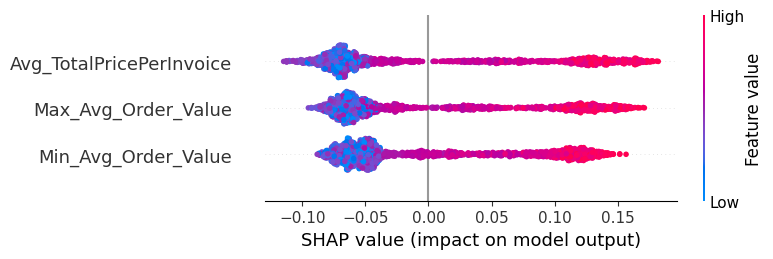

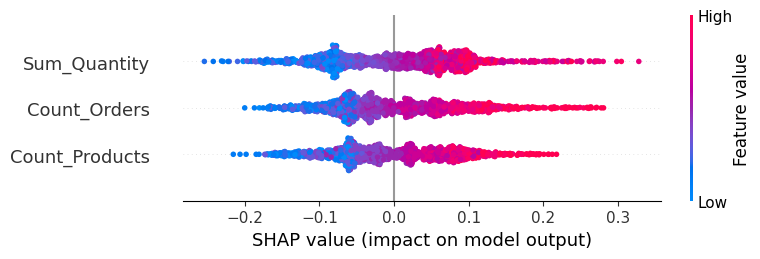

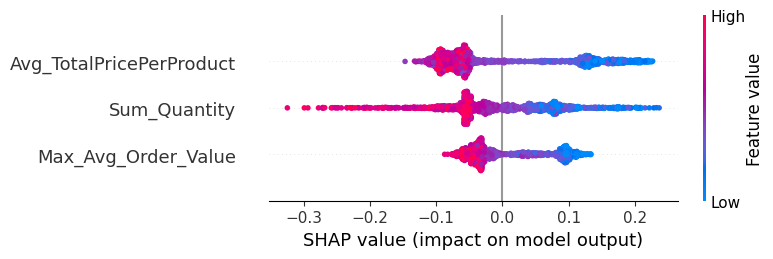

In [18]:
analyzer.plot_shap_summary(3)

### Comparing SHAP and Radar Chart Results (K=3)

Based on the Radar Chart and SHAP Summary for the 3 customer clusters, we can draw the following detailed comparisons:

**Cluster 0**
- **Radar Chart:** Shows strong dominance on the "Preferred Unit Price" axis, while product diversity and purchase frequency are low.  
- **SHAP:** Features such as `Avg_TotalPricePerInvoice`, `Max_Avg_Order_Value`, and `Min_Avg_Order_Value` are identified as important, highlighting aspects not fully captured by the Radar Chart axis for Preferred Unit Price.

**Cluster 1**
- **Radar Chart:** Extends along the product diversity, purchase frequency, and purchase volume axes.  
- **SHAP:** `Sum_quantity` and `Count_Order` are recognized as key features by SHAP, which were not emphasized in the Radar Chart.

**Cluster 2**
- **Radar Chart:** Extends along Recency and Discount Affinity axes.  
- **SHAP:** `Avg_TotalPricePerProduct` and `Sum_quantity` are found to be important, which Radar Chart did not highlight.

**Key Takeaways from Combining Radar Chart and SHAP:**
- **Radar Chart:** Provides a quick visual overview of cluster “shapes” based on key KPIs.  
- **SHAP:** Explains *why* customers are assigned to each cluster and uncovers hidden importan


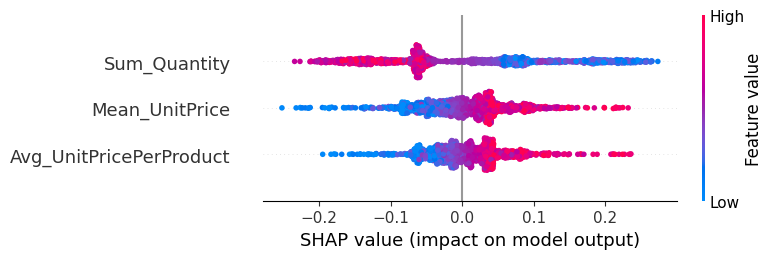

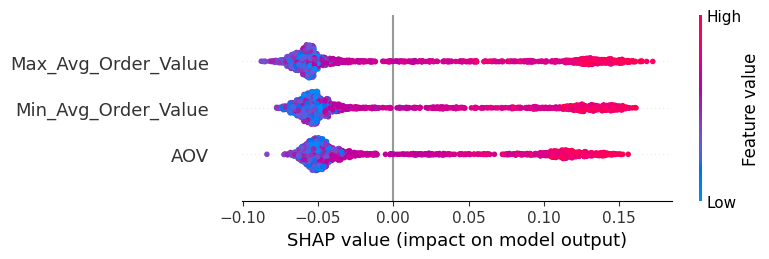

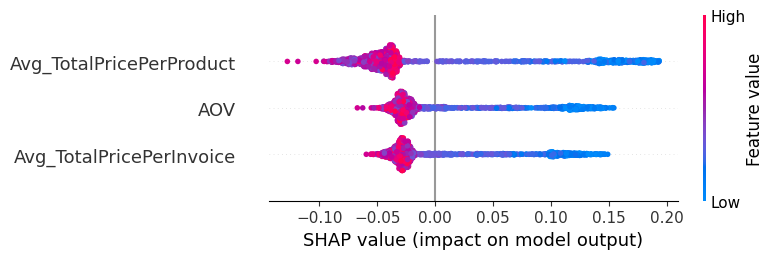

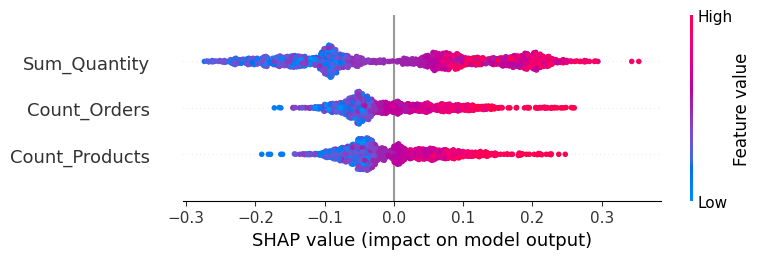

In [19]:
analyzer.plot_shap_summary(4)

### Detailed SHAP Analysis for K=4

Expanding to K=4, the SHAP Beeswarm chart provides deeper insights into how customer groups are separated, particularly the differentiation of high-volume buyers.

**Cluster 0 (High-Potential Customers)**
- **SHAP:** `Sum_quantity` and `Mean_UnitPrice` remain the strongest identifying features. Red points (high values) for these features cluster on the positive side of the SHAP axis for Cluster 0, confirming these as unique characteristics.

**Cluster 1 (Enterprise VIP)**
- **SHAP:** Characterized by high values in `Max_Avg_Order_Value`, `Min_Avg_Order_Value`, and `AOV`. In the Beeswarm chart, points for this cluster concentrate on the right (positive SHAP values).

**Cluster 2 (Economy Tier)**
- **SHAP:** Contrasts with Cluster 1. `Avg_TotalPricePerProduct` and `AOV` have strong positive SHAP contributions. Red points indicate very high actual values for these features.

**Cluster 3 (Diverse Customers)**
- **SHAP:** `Sum_quantity` and `Count_Orders` dominate. High SHAP values for these features indicate that diversity in purchase items is key to distinguishing this cluster from high-volume buyers (Cluster 2) and High-Potential customers (Cluster 0).

**Conclusion**
At K=4, SHAP reveals clearer decision boundaries between clusters. It confirms that splitting the previous “High-Volume Buyers” group into “Low Volume” and “High Volume” segments is justified, based on the large differences in SHAP values for `Sum_quantity` and `Mean_UnitPrice`.


### Key Insights from SHAP Analysis

**Feature Importance**  
SHAP values provide an accurate ranking of the 16 features by importance, helping to:  
- **Improve data collection:** Focus on high-impact features  
- **Refine feature engineering:** Identify which features need adjustment  
- **Align business strategy:** Link KPIs to the most important features  

**Provides a complementary perspective:**  
- **Radar Chart = What** (what are the cluster characteristics)  
- **SHAP = Why** (why a customer belongs to that cluster)  

**Actionable Insight:** Combine both chart types to gain a deeper understanding of customer groups.

**Model Trustworthiness**  
The surrogate model achieves ≥95% accuracy, demonstrating that:  
- RandomForest can reliably learn K-Means cluster assignments  
- SHAP explanations are trustworthy  
- Clusters, whether split into 3 or 4, have clear boundaries, confirming the clustering is done correctly


## Summary

In this notebook, we:

1. **Loaded processed features** – standardized and ready for clustering  
2. **Applied PCA** to understand data structure and reduce dimensionality  
   - The first 2–3 components explain most of the variance  
   - Visualized customer distribution in a low-dimensional space  
3. **Determined the optimal number of clusters** using Silhouette Score  
   - Tested k = 2 to 10  
   - Identified the best-performing values  
4. **Applied K-Means clustering** with k=3 and k=4  
   - Created meaningful customer segments  
   - Visualized clusters in PCA space  
5. **Analyzed cluster characteristics**  
   - Identified distinct customer segments  
   - Interpreted clusters using Radar Charts  
6. **Explained clusters with SHAP values**  
   - Trained a RandomForest surrogate model with ≥95% accuracy  
   - Computed SHAP values for all 1,628 customers  
   - Visualized feature importance  
   - Validated insights with Radar Charts  
7. **Saved clustering results** for business use  

### Key Findings:

- Customers can be meaningfully segmented into 3–4 groups  
- Each segment exhibits distinct purchasing behavior  
- Segments range from high-value customers, product explorers, to frequent buyers  
- SHAP analysis highlights the most important features driving each cluster


### Business Recommendations:

1. **High-Potential Customers (Cluster 0):**  
   - Focus on post-purchase engagement with usage guides and second-purchase incentives to increase repeat frequency.  
   - Send purchase intent surveys to identify potential B2B customers.

2. **Enterprise VIP / Whales (Cluster 1):**  
   - Provide priority support, dedicated account management, and exclusive perks such as early access.  
   - Implement volume-based discounts and encourage long-term contracts.

3. **Economy Tier (Cluster 2):**  
   - Promote flash sales and use FOMO tactics to drive quick purchases.  
   - Optimize automated marketing spend and encourage reviews to enhance seeding effect.

4. **Loyal Regulars (Cluster 3):**  
   - Increase order value through bundle deals and paid membership programs.  
   - Leverage referral channels with affiliate programs to expand the customer base.

